In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.08G/4.09G [01:43<00:00, 54.3MB/s]
100% 4.09G/4.09G [01:43<00:00, 42.3MB/s]


In [ ]:
!unzip -q pulmonary-chest-xray-abnormalities.zip

In [ ]:
!pip install timm

     |████████████████████████████████| 215kB 2.8MB/s 


In [ ]:
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [ ]:
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
cxr_paths = glob(os.path.join('/content','Montgomery', 'MontgomerySet', '*', '*.png'))
print("There are {} images in the dataset".format(len(cxr_paths)))


There are 138 images in the dataset


In [ ]:
cxr_images = [(c_path, 
               [os.path.join('/'.join(c_path.split('/')[:-2]),'ManualMask','leftMask', os.path.basename(c_path)),
               os.path.join('/'.join(c_path.split('/')[:-2]),'ManualMask','rightMask', os.path.basename(c_path))]
              ) for c_path in cxr_paths]

In [ ]:
print(cxr_images[0])

('/content/Montgomery/MontgomerySet/CXR_png/MCUCXR_0228_1.png', ['/content/Montgomery/MontgomerySet/ManualMask/leftMask/MCUCXR_0228_1.png', '/content/Montgomery/MontgomerySet/ManualMask/rightMask/MCUCXR_0228_1.png'])


In [ ]:
import cv2

In [ ]:
from PIL import Image
def imread(in_path):
    OUT_DIM = (512, 512)
    
    # use the skimge function to read the file specified in the path
    img_data = cv2.imread(in_path)
    img_data = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
    
    # make sure the image data is between the range 0-255 and convert the variable into uint8
    n_img = (255*np.array(cv2.resize(img_data,OUT_DIM, interpolation=cv2.INTER_LINEAR))).clip(0,255).astype(np.float32)
        
    return n_img

In [ ]:
from  tqdm.notebook import tqdm
# init empty array for images and masks or in this case segmentations
img_vol, seg_vol = [], []

for img_path, s_paths in tqdm(cxr_images):
    # first read the image paths
    img_vol += [imread(img_path)]    
    #print(img_vol[0].shape)
    # read both images, stack them up, then store them    
    seg_vol += [np.max(np.stack([imread(s_path) for s_path in s_paths],0),0)]


img_vol = np.stack(img_vol,0)
seg_vol = np.stack(seg_vol,0)

In [ ]:
print('Images', img_vol.shape, 'Segmentations', seg_vol.shape)

Images (138, 512, 512, 3) Segmentations (138, 512, 512, 3)


In [ ]:
lbl_names = os.listdir("/content/Montgomery/MontgomerySet/ManualMask/leftMask/")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


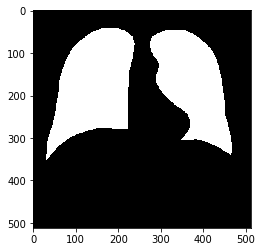

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(seg_vol[0], interpolation='nearest')
plt.show()

In [ ]:
from PIL import Image
from matplotlib import cm
im = Image.fromarray((seg_vol[0]*255).astype(np.uint8), mode="RGB")


In [ ]:
im.save("lung.png")

In [ ]:
lbl_names.sort()
del(lbl_names[-1])

In [ ]:
# This was to create the labels 

for i, image in tqdm(enumerate(seg_vol)):
    im = Image.fromarray((image*255).astype(np.uint8), mode="RGB")
    im.save("/content/labels/"+lbl_names[i])


In [ ]:
help(open_mask)

Help on function open_mask in module fastai.vision.image:

open_mask(fn:Union[pathlib.Path, str], div=False, convert_mode='L', after_open:Callable=None) -> fastai.vision.image.ImageSegment
    Return `ImageSegment` object create from mask in file `fn`. If `div`, divides pixel values by 255.



In [ ]:
path_img = "/content/Montgomery/MontgomerySet/CXR_png/"
path_lbl = "/content/labels/"

In [ ]:
fnames = get_image_files(path_img)
fnames.sort()
fnames[:3]

[PosixPath('/content/Montgomery/MontgomerySet/CXR_png/MCUCXR_0001_0.png'),
 PosixPath('/content/Montgomery/MontgomerySet/CXR_png/MCUCXR_0002_0.png'),
 PosixPath('/content/Montgomery/MontgomerySet/CXR_png/MCUCXR_0003_0.png')]

In [ ]:
lbl_names = get_image_files(path_lbl)
lbl_names.sort()
lbl_names[:3]

[PosixPath('/content/labels/MCUCXR_0001_0.png'),
 PosixPath('/content/labels/MCUCXR_0002_0.png'),
 PosixPath('/content/labels/MCUCXR_0003_0.png')]

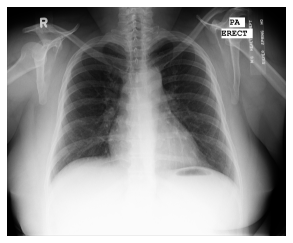

In [ ]:
img_f = fnames[1]
img = open_image(img_f)
img.show(figsize=(5,5))

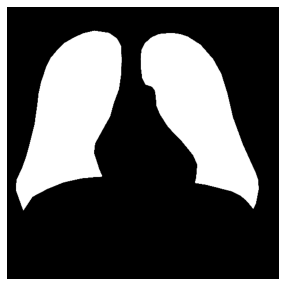

In [ ]:
img_l = lbl_names[1]
mask = open_image(img_l)
mask.show(figsize=(5,5))

In [ ]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([512, 512]), tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]))

In [ ]:
doc(SegmentationItemList.from_folder)

In [ ]:
get_y_fn = lambda x: path_lbl+f"{x.stem}{x.suffix}"

In [ ]:
src = SegmentationItemList.from_folder(path_img).split_subsets(0.8, 0.2).label_from_func(get_y_fn, classes = np.array(['1', '0']))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bs =4
data = (src.transform(size=512)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

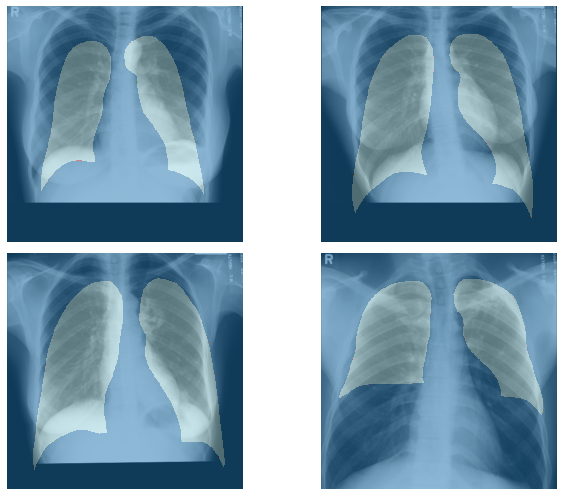

In [ ]:
data.show_batch(3, figsize=(10,7))

In [ ]:
print(data.label_list)

LabelLists;

Train: LabelList (110 items)
x: SegmentationItemList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: SegmentationLabelList
ImageSegment (1, 512, 512),ImageSegment (1, 512, 512),ImageSegment (1, 512, 512),ImageSegment (1, 512, 512),ImageSegment (1, 512, 512)
Path: /content/Montgomery/MontgomerySet/CXR_png;

Valid: LabelList (27 items)
x: SegmentationItemList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: SegmentationLabelList
ImageSegment (1, 512, 512),ImageSegment (1, 512, 512),ImageSegment (1, 512, 512),ImageSegment (1, 512, 512),ImageSegment (1, 512, 512)
Path: /content/Montgomery/MontgomerySet/CXR_png;

Test: None


In [ ]:
data.c

2

In [ ]:
learn = unet_learner(data, models.resnet34, metrics=[accuracy])
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: ignored

In [ ]:
googlr_find(learn)
learn.recorder.plot()

In [ ]:
lr=3e-3

In [ ]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)